<a href="https://www.kaggle.com/code/devanshverma911/stock-price-prediction-using-lstm-feedforward-nn?scriptVersionId=171132575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=7634dd4e77b057c943977184a37362db60b2847f275fa8cb09bcb7e9ad7d69f2
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['PNB.NS','IRCTC.NS','IRFC.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Downloading stock data for each company
company_list = []
for stock in tech_list:
    company_data = pdr.get_data_yahoo(stock, start, end)
    company_data['Company'] = stock  # Adding a column to identify the company
    company_list.append(company_data)

# Concatenating data for all companies into a single DataFrame
df = pd.concat(company_list)

# Resetting index
df.reset_index(inplace=True)

df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Company
728,2024-03-22,135.949997,145.199997,135.000000,140.949997,140.949997,112209659,IRFC.NS
729,2024-03-26,142.399994,148.699997,140.949997,145.699997,145.699997,120887716,IRFC.NS
730,2024-03-27,147.500000,150.949997,141.600006,142.850006,142.850006,89910843,IRFC.NS
731,2024-03-28,144.949997,147.800003,141.300003,142.350006,142.350006,50962525,IRFC.NS
732,2024-04-01,145.199997,146.750000,143.850006,144.800003,144.800003,47979360,IRFC.NS
733,2024-04-02,146.050003,148.149994,144.300003,146.100006,146.100006,59236883,IRFC.NS
734,2024-04-03,145.000000,147.800003,144.500000,145.300003,145.300003,42670072,IRFC.NS
735,2024-04-04,147.000000,148.300003,143.500000,143.750000,143.750000,38590096,IRFC.NS
736,2024-04-05,144.000000,149.399994,142.800003,147.850006,147.850006,81853830,IRFC.NS
737,2024-04-08,150.000000,152.500000,147.000000,147.500000,147.500000,57797243,IRFC.NS


In [3]:
# Replace 'symbol' with the ticker symbol you want to describe, e.g., 'PNB.NS', 'IRCTC.NS', or 'IRFC.NS'
symbol = 'PNB.NS'

# Filter the DataFrame for the specified ticker symbol
symbol_data = df[df['Company'] == symbol]

# Describe the data
description = symbol_data.describe()


In [4]:
description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to std
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7 non-null      object 
 1   Open       8 non-null      float64
 2   High       8 non-null      float64
 3   Low        8 non-null      float64
 4   Close      8 non-null      float64
 5   Adj Close  8 non-null      float64
 6   Volume     8 non-null      float64
dtypes: float64(6), object(1)
memory usage: 512.0+ bytes


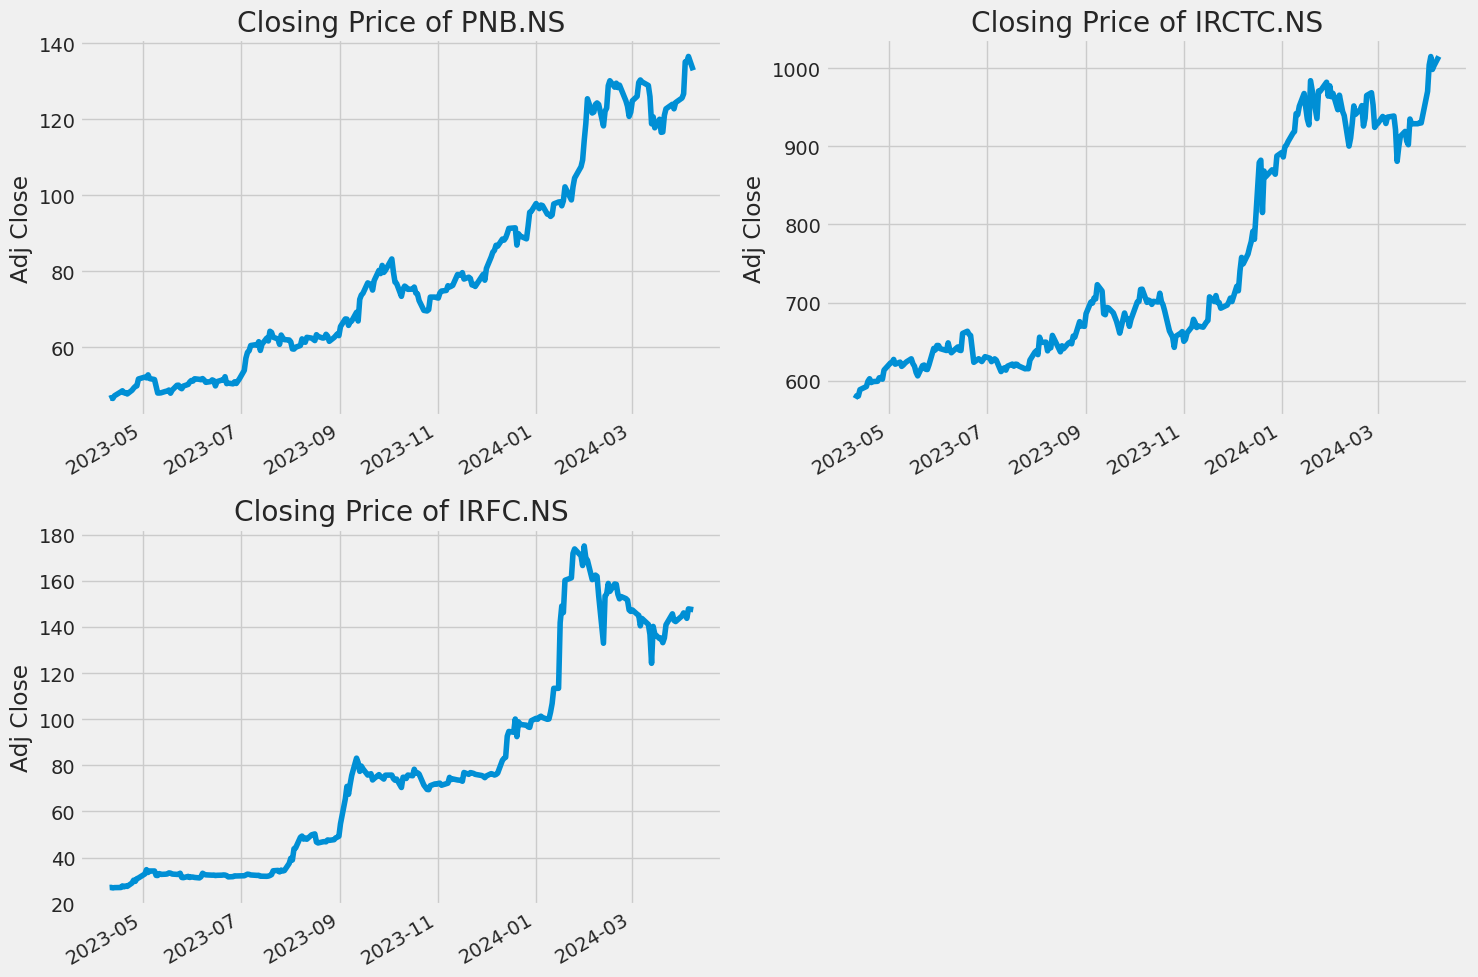

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

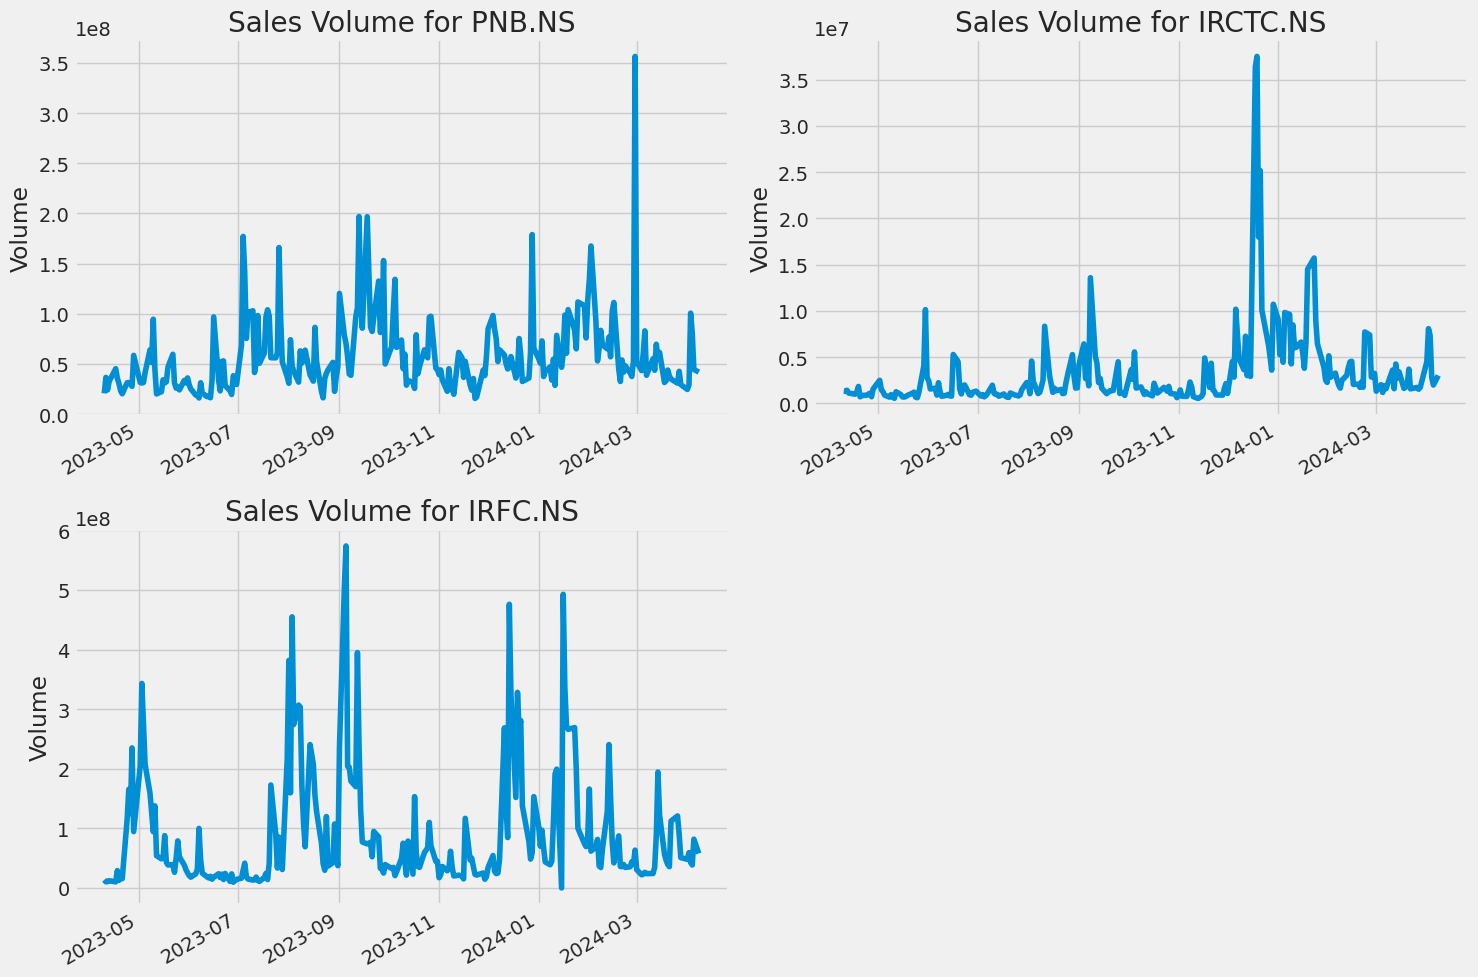

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

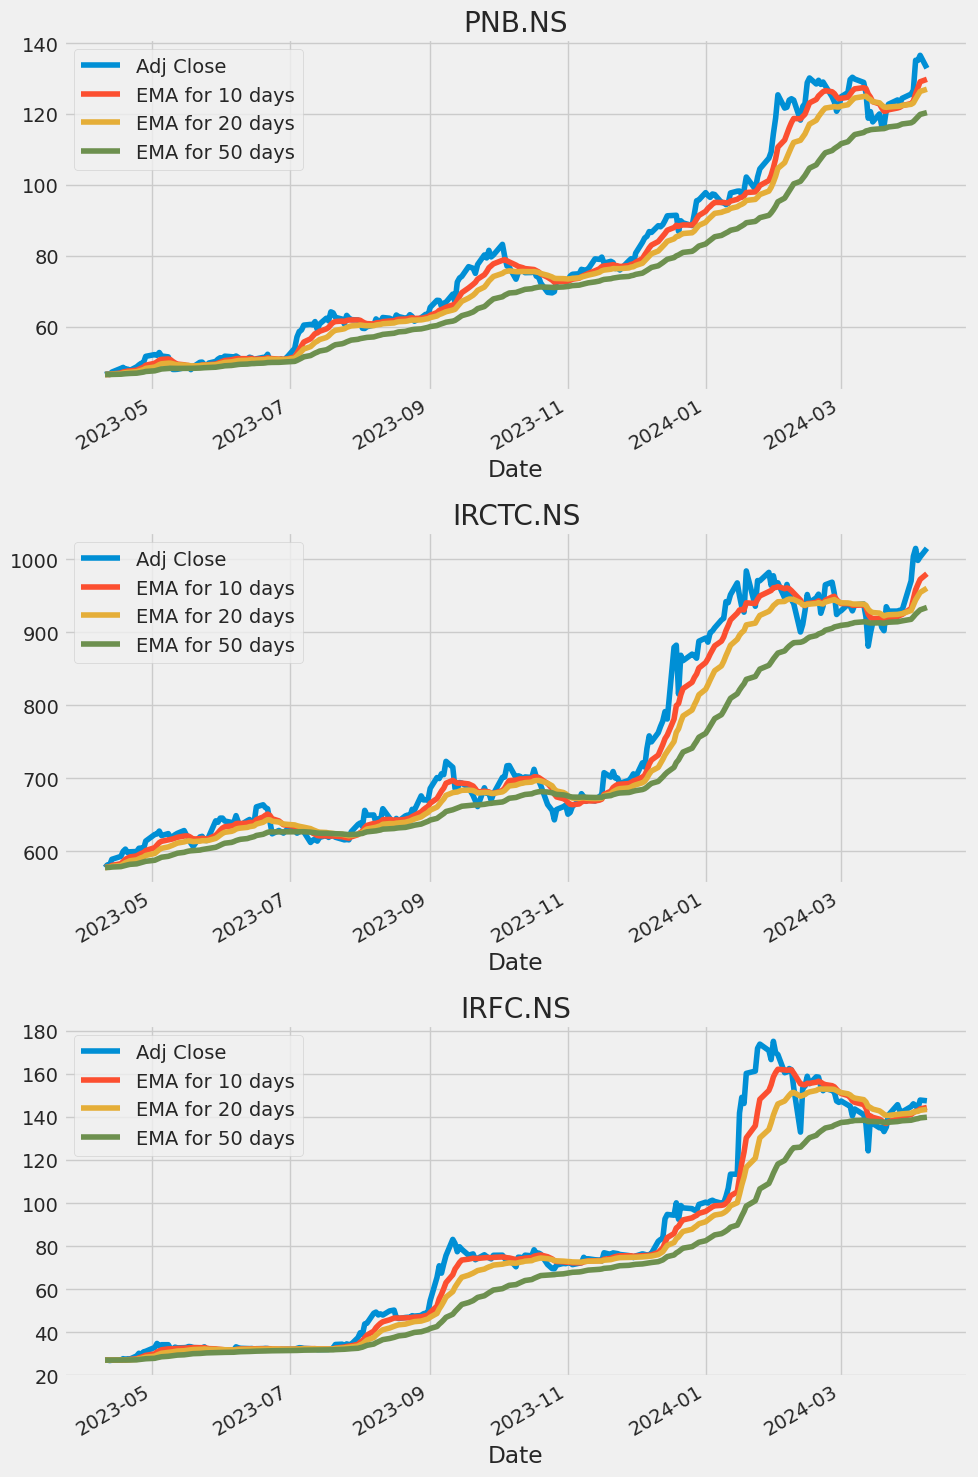

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'company_list' is defined earlier in your code

ema_day = [10, 20, 50]

def calculate_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

# Calculating EMA for each company and each EMA day
for ema in ema_day:
    for company in company_list:
        column_name = f"EMA for {ema} days"
        company[column_name] = calculate_ema(company['Adj Close'], ema)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting for each company and adding EMA values to the dataset
for i, (company, symbol) in enumerate(zip(company_list, tech_list)):
    company[['Adj Close', f'EMA for 10 days', f'EMA for 20 days', f'EMA for 50 days']].plot(ax=axes[i])
    axes[i].set_title(symbol)
    
    # Adding EMA values to the dataset
    for ema in ema_day:
        column_name = f"EMA for {ema} days"
        company[f'{column_name} Value'] = company[column_name]

    # Concatenating with main DataFrame 'df'
    df = pd.concat([df, company], axis=0)

plt.tight_layout()
plt.show()


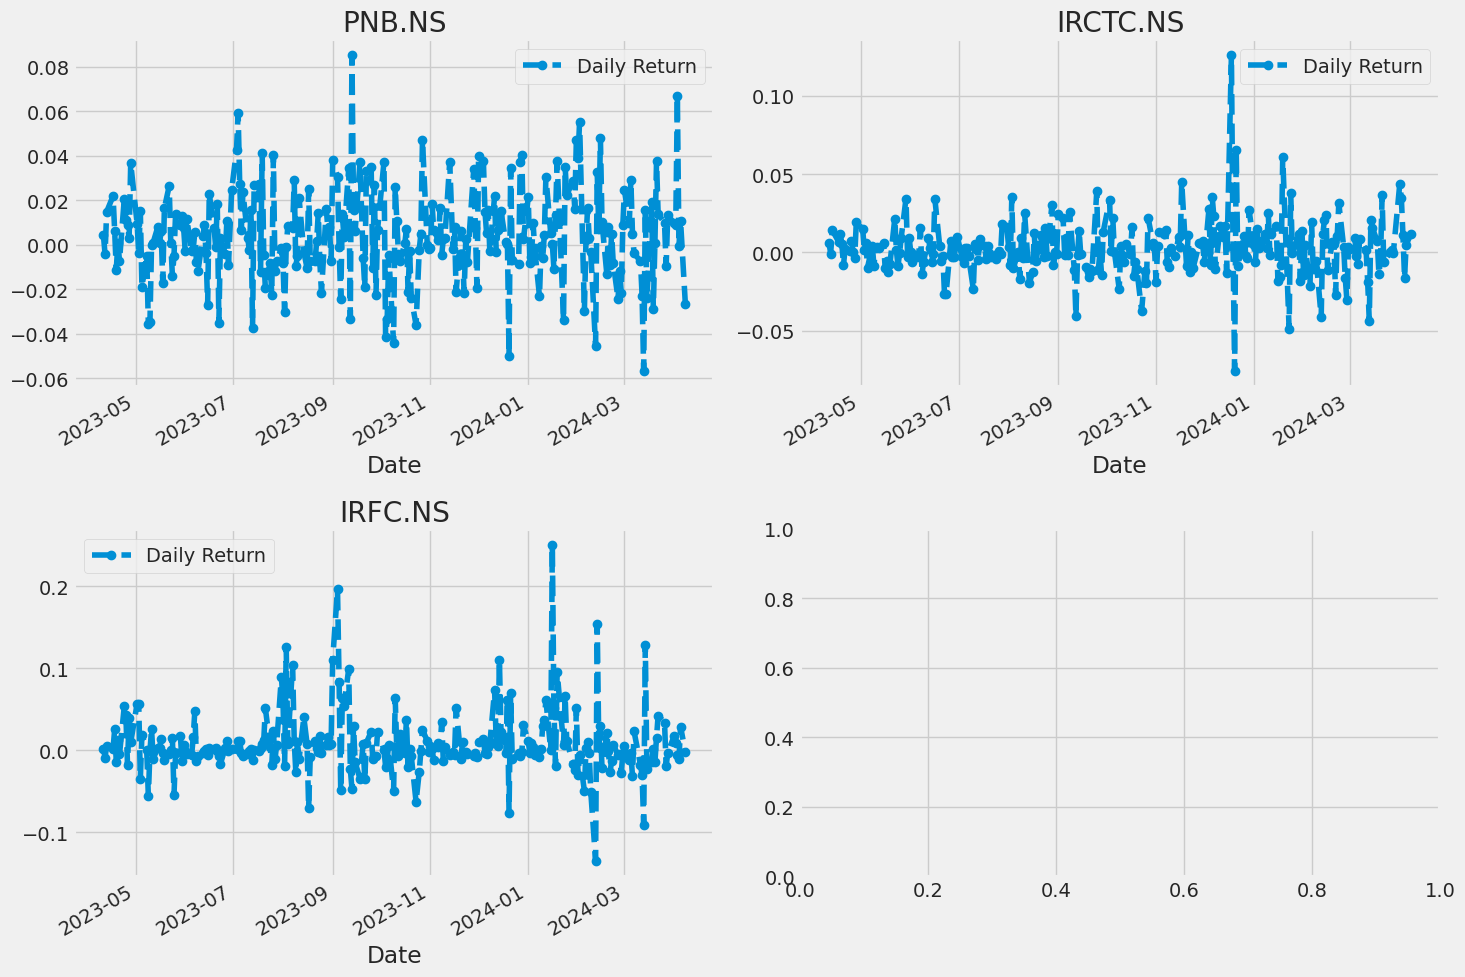

In [8]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, (company, symbol) in enumerate(zip(company_list, tech_list)):
    company[['Daily Return']].plot(ax=axes[i//2, i%2],legend=True, linestyle='--', marker='o')  # Adjusting the subplot index calculation
    axes[i//2, i%2].set_title(symbol)
    
fig.tight_layout()


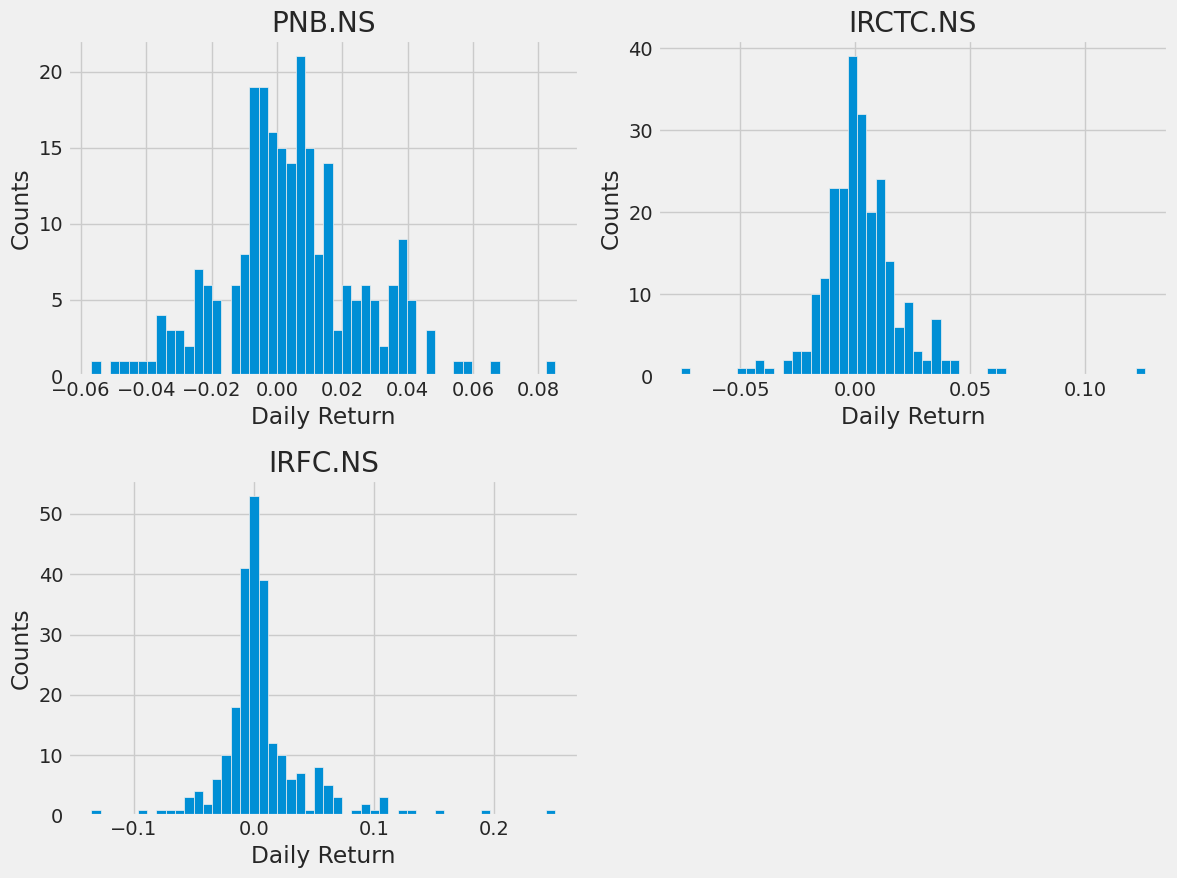

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')
    
plt.tight_layout()

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Company,EMA for 10 days,EMA for 20 days,EMA for 50 days,EMA for 10 days Value,EMA for 20 days Value,EMA for 50 days Value
0,2023-04-10,47.200001,47.450001,46.799999,47.049999,46.450344,20735073,PNB.NS,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-11,47.650002,48.099998,47.150002,47.250000,46.647797,36635159,PNB.NS,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-12,47.549999,47.549999,46.900002,47.049999,46.450344,24089807,PNB.NS,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-13,47.099998,47.950001,46.799999,47.750000,47.141422,32614533,PNB.NS,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-17,47.650002,48.950001,47.349998,48.799999,48.178040,45304745,PNB.NS,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-02 00:00:00,NaT,146.050003,148.149994,144.300003,146.100006,146.100006,59236883,IRFC.NS,142.008836,142.172432,138.783566,142.008836,142.172432,138.783566
2024-04-03 00:00:00,NaT,145.000000,147.800003,144.500000,145.300003,145.300003,42670072,IRFC.NS,142.607230,142.470296,139.039113,142.607230,142.470296,139.039113
2024-04-04 00:00:00,NaT,147.000000,148.300003,143.500000,143.750000,143.750000,38590096,IRFC.NS,142.815006,142.592172,139.223854,142.815006,142.592172,139.223854
2024-04-05 00:00:00,NaT,144.000000,149.399994,142.800003,147.850006,147.850006,81853830,IRFC.NS,143.730461,143.092919,139.562134,143.730461,143.092919,139.562134


In [11]:
symbol_to_extract = 'PNB.NS'  # Replace 'PNB.NS' with the symbol you want

# Use boolean indexing to filter the DataFrame for the specified symbol
symbol_data = df[df['Company'] == symbol_to_extract]

# Print the extracted data
print(symbol_data)


                          Date        Open        High         Low  \
0                   2023-04-10   47.200001   47.450001   46.799999   
1                   2023-04-11   47.650002   48.099998   47.150002   
2                   2023-04-12   47.549999   47.549999   46.900002   
3                   2023-04-13   47.099998   47.950001   46.799999   
4                   2023-04-17   47.650002   48.950001   47.349998   
...                        ...         ...         ...         ...   
2024-04-02 00:00:00        NaT  125.500000  127.000000  124.949997   
2024-04-03 00:00:00        NaT  126.699997  136.699997  125.599998   
2024-04-04 00:00:00        NaT  137.050003  137.350006  134.000000   
2024-04-05 00:00:00        NaT  135.100006  137.500000  134.300003   
2024-04-08 00:00:00        NaT  136.500000  136.800003  132.500000   

                          Close   Adj Close     Volume Company  \
0                     47.049999   46.450344   20735073  PNB.NS   
1                     47.25

In [12]:
data= symbol_data.filter(['Close'])
dataset= data.values

training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

468

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00223465],
       [0.        ],
       [0.00782124],
       [0.01955307],
       [0.02290502],
       [0.01675978],
       [0.01731843],
       [0.01340783],
       [0.02458101],
       [0.03072626],
       [0.0357542 ],
       [0.03743019],
       [0.05810056],
       [0.06368716],
       [0.06145251],
       [0.07039105],
       [0.05921787],
       [0.05642457],
       [0.0357542 ],
       [0.01620113],
       [0.01620113],
       [0.01675978],
       [0.02122907],
       [0.02178772],
       [0.02513966],
       [0.01564247],
       [0.02458101],
       [0.03910614],
       [0.03966479],
       [0.0318436 ],
       [0.0290503 ],
       [0.0368715 ],
       [0.04189944],
       [0.04916203],
       [0.05363127],
       [0.05195532],
       [0.05865922],
       [0.05698326],
       [0.05586592],
       [0.05921787],
       [0.05474862],
       [0.04804468],
       [0.05027933],
       [0.05530727],
       [0.05307262],
       [0.03743019],
       [0.050

In [14]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.        , 0.00223465, 0.        , 0.00782124, 0.01955307,
       0.02290502, 0.01675978, 0.01731843, 0.01340783, 0.02458101,
       0.03072626, 0.0357542 , 0.03743019, 0.05810056, 0.06368716,
       0.06145251, 0.07039105, 0.05921787, 0.05642457, 0.0357542 ,
       0.01620113, 0.01620113, 0.01675978, 0.02122907, 0.02178772,
       0.02513966, 0.01564247, 0.02458101, 0.03910614, 0.03966479,
       0.0318436 , 0.0290503 , 0.0368715 , 0.04189944, 0.04916203,
       0.05363127, 0.05195532, 0.05865922, 0.05698326, 0.05586592,
       0.05921787, 0.05474862, 0.04804468, 0.05027933, 0.05530727,
       0.05307262, 0.03743019, 0.05027933, 0.05474862, 0.05418997,
       0.06480446, 0.04413408, 0.03854749, 0.03631285, 0.04245809,
       0.03743019, 0.05139667, 0.07597764, 0.11173184, 0.12905027])]
[0.13351955590617626]

[array([0.        , 0.00223465, 0.        , 0.00782124, 0.01955307,
       0.02290502, 0.01675978, 0.01731843, 0.01340783, 0.02458101,
       0.03072626, 0.0357542 , 0.03

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

2024-04-09 09:36:32.462345: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 09:36:32.462458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 09:36:32.617326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0236
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0046
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0055
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0054
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0045
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0073
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.2951e-04
Epoch 9/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0113
Epoch 10/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0018


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


3.1504838297109146

In [17]:
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

/tmp/ipykernel_27/718862403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
2024-03-01 00:00:00,124.849998,121.682091
2024-03-04 00:00:00,126.050003,124.821304
2024-03-05 00:00:00,129.699997,125.593773
2024-03-06 00:00:00,130.350006,128.641663
2024-03-07 00:00:00,129.850006,128.673386
2024-03-11 00:00:00,128.899994,127.656349
2024-03-12 00:00:00,125.949997,126.706024
2024-03-13 00:00:00,118.800003,124.043083
2024-03-14 00:00:00,120.650002,117.465073
2024-03-15 00:00:00,117.750000,120.352203


In [18]:
from keras.models import Sequential
from keras.layers import Dense

# Build the feedforward neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 99/408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0657

I0000 00:00:1712655434.650830     131 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0316
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0061
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0098
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0086
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0110
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0149
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0048
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0076
Epoch 9/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0078
Epoch 10/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035


In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


6.041799626322507

In [20]:
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

/tmp/ipykernel_27/718862403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
2024-03-01 00:00:00,124.849998,124.079956
2024-03-04 00:00:00,126.050003,124.222969
2024-03-05 00:00:00,129.699997,124.967133
2024-03-06 00:00:00,130.350006,126.572075
2024-03-07 00:00:00,129.850006,127.703682
2024-03-11 00:00:00,128.899994,128.714325
2024-03-12 00:00:00,125.949997,129.060150
2024-03-13 00:00:00,118.800003,128.629501
2024-03-14 00:00:00,120.650002,126.805557
2024-03-15 00:00:00,117.750000,126.206024
